In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = "2010-01-01"
end = "2019-12-31"

df = data.DataReader('AAPL','yahoo',start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452590
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553025
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564354
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459939
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.027298
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.416679
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.389572
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.813278
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.337997


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452590
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553025
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564354
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459939
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998


In [5]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


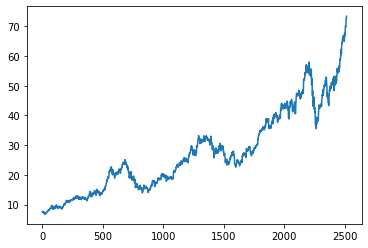

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2512,71.222504,70.730003,71.172501,71.067497,48478800.0
2513,72.495003,71.175003,71.205002,72.477501,93121200.0
2514,73.492500,72.029999,72.779999,72.449997,146266000.0
2515,73.172501,71.305000,72.364998,72.879997,144114400.0


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

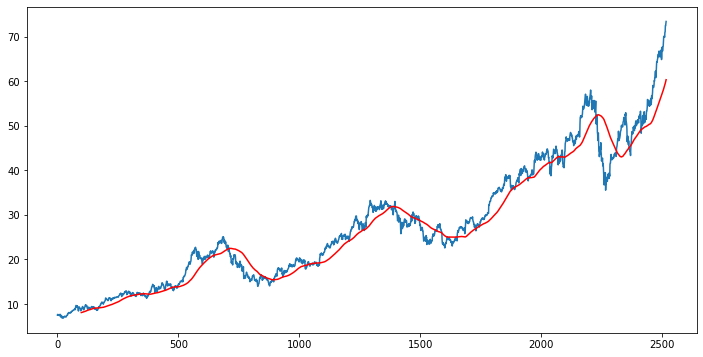

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

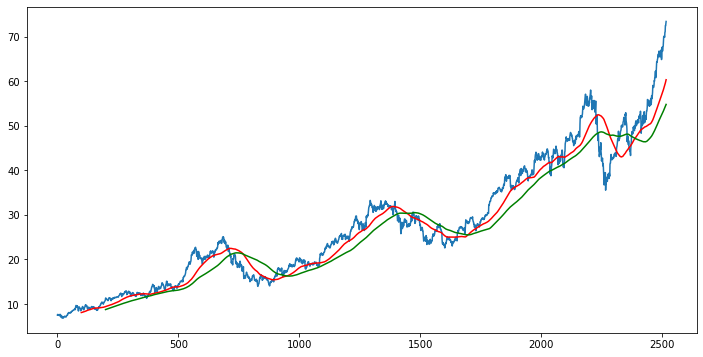

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(2517, 5)

In [13]:
#splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [14]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [15]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [21]:
data_training_array.shape

(1761, 1)

In [22]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [25]:
x_train.shape

(1661, 100, 1)

In [23]:
# ML model

In [24]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [26]:
model = Sequential()
model.add(LSTM(units = 50, activation= 'relu', return_sequences= True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation= 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation= 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [28]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 18s 218ms/step - loss: 0.0684
Epoch 2/50
52/52 [==============================] - 11s 212ms/step - loss: 0.0139
Epoch 3/50
52/52 [==============================] - 11s 211ms/step - loss: 0.0125
Epoch 4/50
52/52 [==============================] - 11s 210ms/step - loss: 0.0116
Epoch 5/50
52/52 [==============================] - 11s 212ms/step - loss: 0.0103
Epoch 6/50
52/52 [==============================] - 11s 211ms/step - loss: 0.0097
Epoch 7/50
52/52 [==============================] - 11s 210ms/step - loss: 0.0093
Epoch 8/50
52/52 [==============================] - 11s 210ms/step - loss: 0.0080
Epoch 9/50
52/52 [==============================] - 11s 210ms/step - loss: 0.0085
Epoch 10/50
52/52 [==============================] - 11s 209ms/step - loss: 0.0079
Epoch 11/50
52/52 [==============================] - 11s 214ms/step - loss: 0.0082
Epoch 12/50
52/52 [==============================] - 11s 210ms/step - loss: 0.0070
Epoch 13/50
5

In [29]:
model.save('keras_model1.h5')

In [30]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [31]:
data_testing.shape

(756, 1)

In [32]:
past_100_days = data_training.tail(100)

In [33]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [34]:
final_df

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000
...,...
851,71.067497
852,72.477501
853,72.449997
854,72.879997


In [37]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [38]:
input_data.shape

(856, 1)

In [39]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [40]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [41]:
# Making predictions

y_predicted = model.predict(x_test)
y_predicted.shape

(756, 1)

In [42]:
y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [43]:
y_predicted

array([[0.17031345],
       [0.17044637],
       [0.17058267],
       [0.17071998],
       [0.17085603],
       [0.17098978],
       [0.17112157],
       [0.17125398],
       [0.17138961],
       [0.171532  ],
       [0.1716825 ],
       [0.17184053],
       [0.17200705],
       [0.17218322],
       [0.17236842],
       [0.1725621 ],
       [0.17276353],
       [0.17297131],
       [0.17319149],
       [0.17343067],
       [0.17369363],
       [0.17398158],
       [0.17429188],
       [0.1746561 ],
       [0.17510559],
       [0.17566553],
       [0.17635734],
       [0.1771996 ],
       [0.17820445],
       [0.1793768 ],
       [0.18071131],
       [0.18220142],
       [0.18384588],
       [0.18564218],
       [0.18758176],
       [0.18965217],
       [0.19184323],
       [0.19414423],
       [0.19653669],
       [0.19896309],
       [0.20141491],
       [0.20388493],
       [0.20637798],
       [0.20889494],
       [0.21139094],
       [0.21387723],
       [0.2163535 ],
       [0.218

In [44]:
scaler.scale_

array([0.02099517])

In [45]:
scale_factor = 1/0.0025047
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

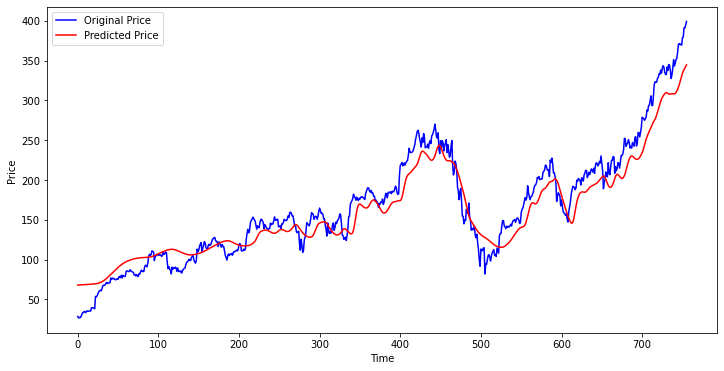

In [46]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()